In [147]:
import numpy as np
import matplotlib.pyplot as plt
import math

### variables

In [148]:
delta = 0.01
n = 1000
prob = np.arange(0, 1.001, 0.001)

In [149]:
np.random.seed(seed=42)

### Helper functions

In [150]:
def count(t):
    return np.sum(t == 1)

def getEmpFreq(inp):
    #Count of tails per 20 throw
    x = np.apply_along_axis(count, 1, inp)
    
    #Get the freqency
    map_ = lambda t: t / n 
    return map_(x)

def get_max_emp_freq():
    values = []
    for p in prob:
        # Create a 1000x1 matrix with 0 and 1 with probability p and 1-p
        data = np.random.choice((0,1), size=(n, 1), p=(1-p, p))
        # Get the value of which the empirical frequency converges and add epsilon
        x = round(max(getEmpFreq(data).cumsum()), 4)
        values.append(x)
    return values
max_list = get_max_emp_freq()

np.random.binomial

<function RandomState.binomial>

### functions

In [151]:
def hoeffding():
    epsilon = math.sqrt(math.log(1/delta)/(2*n))
    print("Epsilon: ", epsilon)
    values = []
    for i in max_list:
        i = i + epsilon
        values.append(i)
    return values

def kl_inequality():
    epsilon = math.log((n+1)/delta)/n
    values = []
    print(epsilon)
    return values

kl_inequality()

0.011513924965303313


[]

### plots

Epsilon:  0.04798525912188081
[0.04798525912188081, 0.048985259121880814, 0.04798525912188081, 0.05298525912188081, 0.050985259121880816, 0.05398525912188081, 0.05298525912188081, 0.05198525912188082, 0.05498525912188081, 0.055985259121880813, 0.05498525912188081, 0.06298525912188081, 0.06198525912188081, 0.06198525912188081, 0.06498525912188081, 0.05898525912188081, 0.06698525912188082, 0.06498525912188081, 0.0699852591218808, 0.07798525912188081, 0.06898525912188082, 0.07398525912188081, 0.0719852591218808, 0.0719852591218808, 0.07698525912188081, 0.0709852591218808, 0.0709852591218808, 0.06698525912188082, 0.07598525912188081, 0.0719852591218808, 0.07498525912188081, 0.08698525912188082, 0.07898525912188081, 0.08098525912188081, 0.07698525912188081, 0.08098525912188081, 0.09098525912188081, 0.08198525912188082, 0.07798525912188081, 0.08498525912188082, 0.09798525912188082, 0.08298525912188082, 0.09598525912188081, 0.09398525912188081, 0.08798525912188082, 0.08898525912188082, 0.0859

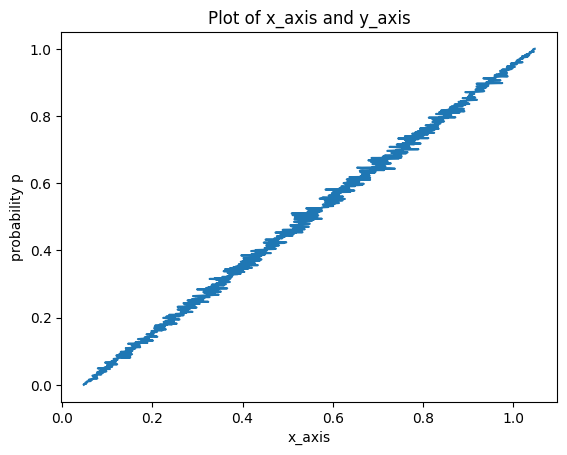

In [152]:
x_axis = hoeffding()
y_axis = prob
print(x_axis, len(x_axis))
print(y_axis, len(y_axis))

plt.plot(x_axis, y_axis)
plt.xlabel('x_axis')
plt.ylabel('probability p')
plt.title('Plot of x_axis and y_axis')
plt.show()


In [153]:
def closest_point_binary_search(points, target):
    left, right = 0, len(points) - 1

    while left <= right:
        mid = (left + right) // 2
        print(left, right, mid)
        if points[mid] == target:
            return points[mid]

        if points[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    # At this point, left and right have crossed, and 'left' points to the closest point.
    # You can choose either 'left' or 'right' based on your preference.

    if left == 0:
        return points[left]
    elif right == len(points) - 1:
        return points[right]
    else:
        # Check which of the two closest points is actually closer
        return min(points[left], points[right], key=lambda x: abs(x - target))

# Example usage:
points = max_list
target_value = math.log((n+1)/delta)/n

closest = closest_point_binary_search(points, target_value)
print(f"The closest point to {target_value} is {closest}")


0 1000 500
0 499 249
0 248 124
0 123 61
0 60 30
0 29 14
0 13 6
7 13 10
11 13 12
11 11 11
0.015 0.007
The closest point to 0.011513924965303313 is 0.015
